Epoch 1/10
938/938 [==============================] - 74s 77ms/step - loss: 0.1744 - accuracy: 0.9464 - val_loss: 0.0420 - val_accuracy: 0.9850
Epoch 2/10
938/938 [==============================] - 69s 73ms/step - loss: 0.0501 - accuracy: 0.9841 - val_loss: 0.0320 - val_accuracy: 0.9900
Epoch 3/10
938/938 [==============================] - 66s 70ms/step - loss: 0.0347 - accuracy: 0.9894 - val_loss: 0.0371 - val_accuracy: 0.9880
Epoch 4/10
938/938 [==============================] - 66s 70ms/step - loss: 0.0276 - accuracy: 0.9912 - val_loss: 0.0307 - val_accuracy: 0.9895
Epoch 5/10
938/938 [==============================] - 66s 70ms/step - loss: 0.0216 - accuracy: 0.9930 - val_loss: 0.0323 - val_accuracy: 0.9891
Epoch 6/10
938/938 [==============================] - 65s 70ms/step - loss: 0.0172 - accuracy: 0.9943 - val_loss: 0.0294 - val_accuracy: 0.9915
Epoch 7/10
938/938 [==============================] - 66s 71ms/step - loss: 0.0150 - accuracy: 0.9948 - val_loss: 0.0303 - val_accuracy:

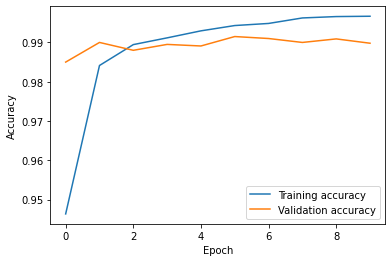

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add a channel dimension to the images
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Define the CNN model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training set
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Plot the training and validation accuracy curves over the epochs
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
